In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
%cd /gdrive/My Drive/CMSE Final Project

Mounted at /gdrive
/gdrive/My Drive/CMSE Final Project


In [ ]:
df = pd.read_parquet('CleanedData.gzip').drop(['basesalary', 'stockgrantvalue', 'bonus', 'timestamp'], axis=1).reset_index(drop=True)
df

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,gender,Race,Education,state
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,None,Unknown,None,None,CA
1,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,None,Unknown,None,None,CA
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,None,Unknown,None,None,WA
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,None,Unknown,None,None,CA
4,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,None,Unknown,None,None,CA
...,...,...,...,...,...,...,...,...,...,...,...,...
59114,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),Unknown,None,None,WA
59115,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,Unknown,None,None,WA
59116,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,Unknown,None,None,WA
59117,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,Unknown,None,None,CA


In [ ]:
num_categories = {'company' : 5, 'level' : 5, 'location' : 5, 'tag' : 5}
for column, num in num_categories.items():
        s = df[column].value_counts()
        to_other = s[s < num].index
        df.loc[df[column].isin(to_other), column] = 'Other'
        prop = round((df[column] == "Other").sum() / len(df), 3)

In [ ]:
test = pd.read_parquet('CleanedData.gzip').drop(['basesalary', 'stockgrantvalue', 'bonus', 'timestamp'], axis=1).reset_index(drop=True)
num_categories = {'company' : 5, 'level' : 5, 'location' : 5, 'tag' : 5}
for column, num in num_categories.items():
        s = test[column].value_counts()
        to_other = s[s < num].index
        test.loc[test[column].isin(to_other), column] = 'Other'
        prop = round((test[column] == "Other").sum() / len(test), 3)
test.nunique()

company                    1076
level                       591
title                        15
totalyearlycompensation     463
location                    379
yearsofexperience            49
yearsatcompany               66
tag                         307
gender                        4
Race                          5
Education                     5
state                        50
dtype: int64

In [ ]:
print(f'There are {pd.get_dummies(df).shape[1]} features in the onehot encoded version of this dataset') 

There are 2435 features in the onehot encoded version of this dataset


In [ ]:
X = df.drop('totalyearlycompensation', axis = 1)
Y = df['totalyearlycompensation']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=92)

numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object', 'category', 'period[M]']).columns
all_columns = list(numeric_features)+list(categorical_features)

In [ ]:
!pip install category_encoders

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectPercentile
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.preprocessing import PowerTransformer, normalize, SplineTransformer
from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import DenseTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import TruncatedSVD
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor
from category_encoders import TargetEncoder
from sklearn.impute import IterativeImputer
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.svm import SVC
import plotly.express as px
from prince import FAMD
import pandas as pd
import numpy as np
import joblib

In [ ]:
#All
format = Pipeline([
                   ('encode', TargetEncoder()),
                   ('scaler', 'passthrough'),
                   ('feature engineering', 'passthrough'),
                   ('feature selection', 'passthrough'),
                   ('dim reduction', 'passthrough'),
                   ('model', 'passthrough'),
])
scalers = ['passthrough', StandardScaler(), RobustScaler(), QuantileTransformer(), MinMaxScaler(), PowerTransformer()]

feature_engineering = ['passthrough',
            PolynomialFeatures(3),
            SplineTransformer(),
            FeatureAgglomeration(),
            ]

feature_selection = [
                      'passthrough',
                      VarianceThreshold(0.5),
                      SelectKBest(k=11),
                      SelectKBest(k=5),
                      SelectPercentile(0.90),
                      SelectPercentile(0.7)
 ]                                       

dim_reduction = [
                     'passthrough',
                     PCA(10),
                     PCA(6),
                     PCA(3),
]

mods = [ 
          LinearRegression(),
          SGDRegressor(loss='squared_error'),
          KNeighborsRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          HistGradientBoostingRegressor(),
          MLPRegressor(),
          AdaBoostRegressor()
          ]

param_grid = [{'scaler':scalers,
               'feature engineering': feature_engineering,
              'feature selection':feature_selection,
               'dim reduction': dim_reduction,
              'model':mods}]


result = GridSearchCV(format, param_grid, n_jobs=-1, cv = 2, verbose=True, scoring='explained_variance')
result.fit(x_train, y_train)

Fitting 2 folds for each of 4608 candidates, totalling 9216 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


5696 fits failed out of a total of 9216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, i

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('encode', TargetEncoder()),
                                       ('scaler', 'passthrough'),
                                       ('feature engineering', 'passthrough'),
                                       ('feature selection', 'passthrough'),
                                       ('dim reduction', 'passthrough'),
                                       ('model', 'passthrough')]),
             n_jobs=-1,
             param_grid=[{'dim reduction': ['passthrough', PCA(n_components=10),
                                            PCA(n_components=6),
                                            PCA(n_components=3)],
                          'feature en...
                                                SelectPercentile(score_func=0.7)],
                          'model': [LinearRegression(), SGDRegressor(),
                                    KNeighborsRegressor(),
                                    RandomForestRegressor(),
                                    GradientBoostingRegressor(),
                                    HistGradientBoostingRegressor(),
                                    MLPRegressor(), AdaBoostRegressor()],
                          'scaler': ['passthrough', StandardScaler(),
                                     RobustScaler(), QuantileTransformer(),
                                     MinMaxScaler(), PowerTransformer()]}],
             scoring='explained_variance', verbose=True)

In [ ]:
result.best_estimator_

Pipeline(steps=[('encode',
                 TargetEncoder(cols=['company', 'level', 'title', 'location',
                                     'tag', 'gender', 'Race', 'Education',
                                     'state'])),
                ('scaler', MinMaxScaler()),
                ('feature engineering', SplineTransformer()),
                ('feature selection', 'passthrough'),
                ('dim reduction', 'passthrough'),
                ('model', HistGradientBoostingRegressor())])

In [ ]:
result.best_estimator_.score(x_train, y_train)

0.8081928830062541

In [ ]:
pred = result.best_estimator_.predict(x_train)
pred

array([138680.64328174, 368963.71229754, 221670.25882555, ...,
       200168.07247269, 308516.98360241, 175780.25290122])

In [ ]:
result.best_estimator_.score(x_test, y_test)

0.773755053270618

In [ ]:
joblib.dump(result, 'results_big_run.pkl')

['results_big_run.pkl']

In [ ]:
joblib.load('results_big_run.pkl')

In [ ]:
mean_absolute_error(pred, y_train)

29054.240868187248

In [ ]:
result.best_estimator_

Pipeline(steps=[('encode',
                 TargetEncoder(cols=['company', 'level', 'title', 'location',
                                     'tag', 'gender', 'Race', 'Education',
                                     'state'])),
                ('scaler', 'passthrough'),
                ('feature engineering', 'passthrough'),
                ('feature selection', 'passthrough'),
                ('dim reduction', 'passthrough'),
                ('model', HistGradientBoostingRegressor())])

In [ ]:
result.score(x_test, y_test)

0.7749118626926955

In [ ]:
df = pd.DataFrame(result.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dim reduction,param_feature engineering,param_feature selection,param_model,param_scaler,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.451099,0.001867,0.083047,0.000635,passthrough,passthrough,passthrough,LinearRegression(),passthrough,"{'dim reduction': 'passthrough', 'feature engi...",0.661496,0.663059,0.662277,0.000781,628
1,0.459643,0.001270,0.086158,0.001500,passthrough,passthrough,passthrough,LinearRegression(),StandardScaler(),"{'dim reduction': 'passthrough', 'feature engi...",0.661496,0.663059,0.662277,0.000781,637
2,0.459148,0.013779,0.086012,0.004507,passthrough,passthrough,passthrough,LinearRegression(),RobustScaler(),"{'dim reduction': 'passthrough', 'feature engi...",0.661496,0.663059,0.662277,0.000781,650
3,0.519369,0.010702,0.121487,0.000597,passthrough,passthrough,passthrough,LinearRegression(),QuantileTransformer(),"{'dim reduction': 'passthrough', 'feature engi...",0.626030,0.614959,0.620495,0.005536,1184
4,0.423644,0.007672,0.083355,0.000999,passthrough,passthrough,passthrough,LinearRegression(),MinMaxScaler(),"{'dim reduction': 'passthrough', 'feature engi...",0.661496,0.663059,0.662277,0.000781,637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6907,0.392244,0.007037,0.000000,0.000000,PCA(n_components=3),SelectPercentile(score_func=0.7),SelectPercentile(score_func=0.7),AdaBoostRegressor(),StandardScaler(),"{'dim reduction': PCA(n_components=3), 'featur...",NaN,NaN,NaN,NaN,2365
6908,0.402592,0.000722,0.000000,0.000000,PCA(n_components=3),SelectPercentile(score_func=0.7),SelectPercentile(score_func=0.7),AdaBoostRegressor(),RobustScaler(),"{'dim reduction': PCA(n_components=3), 'featur...",NaN,NaN,NaN,NaN,2366
6909,0.442288,0.006811,0.000000,0.000000,PCA(n_components=3),SelectPercentile(score_func=0.7),SelectPercentile(score_func=0.7),AdaBoostRegressor(),QuantileTransformer(),"{'dim reduction': PCA(n_components=3), 'featur...",NaN,NaN,NaN,NaN,2367
6910,0.388421,0.001996,0.000000,0.000000,PCA(n_components=3),SelectPercentile(score_func=0.7),SelectPercentile(score_func=0.7),AdaBoostRegressor(),MinMaxScaler(),"{'dim reduction': PCA(n_components=3), 'featur...",NaN,NaN,NaN,NaN,6075


In [ ]:
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_dim reduction', 'param_feature engineering',
       'param_feature selection', 'param_model', 'param_scaler', 'params',
       'split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [ ]:
df['param_model'] = df['param_model'].astype(str)
df['param_dim reduction'] = df['param_dim reduction'].astype(str)
df['param_feature engineering'] = df['param_feature engineering'].astype(str)
df['param_feature selection'] = df['param_feature selection'].astype(str)
df['param_scaler'] = df['param_scaler'].astype(str)

In [ ]:
s = df.groupby('param_scaler').median().reset_index()
fig = px.bar(s, 'param_scaler', 'mean_test_score', color = 'mean_fit_time', width=550, height=550, labels={
    'param_scaler':'Scaling Method',
    'mean_test_score':'Median Variance Explained',
    'mean_fit_time':'Median Fit Time (s)'
})
fig.update_yaxes(range=(0, 1))
fig.show()

In [ ]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dim reduction,param_feature engineering,param_feature selection,param_model,param_scaler,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.451099,0.001867,0.083047,0.000635,passthrough,passthrough,passthrough,LinearRegression(),passthrough,"{'dim reduction': 'passthrough', 'feature engi...",0.661496,0.663059,0.662277,0.000781,628
1,0.459643,0.001270,0.086158,0.001500,passthrough,passthrough,passthrough,LinearRegression(),StandardScaler(),"{'dim reduction': 'passthrough', 'feature engi...",0.661496,0.663059,0.662277,0.000781,637
2,0.459148,0.013779,0.086012,0.004507,passthrough,passthrough,passthrough,LinearRegression(),RobustScaler(),"{'dim reduction': 'passthrough', 'feature engi...",0.661496,0.663059,0.662277,0.000781,650
3,0.519369,0.010702,0.121487,0.000597,passthrough,passthrough,passthrough,LinearRegression(),QuantileTransformer(),"{'dim reduction': 'passthrough', 'feature engi...",0.626030,0.614959,0.620495,0.005536,1184
4,0.423644,0.007672,0.083355,0.000999,passthrough,passthrough,passthrough,LinearRegression(),MinMaxScaler(),"{'dim reduction': 'passthrough', 'feature engi...",0.661496,0.663059,0.662277,0.000781,637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6907,0.392244,0.007037,0.000000,0.000000,PCA(n_components=3),SelectPercentile(score_func=0.7),SelectPercentile(score_func=0.7),AdaBoostRegressor(),StandardScaler(),"{'dim reduction': PCA(n_components=3), 'featur...",NaN,NaN,NaN,NaN,2365
6908,0.402592,0.000722,0.000000,0.000000,PCA(n_components=3),SelectPercentile(score_func=0.7),SelectPercentile(score_func=0.7),AdaBoostRegressor(),RobustScaler(),"{'dim reduction': PCA(n_components=3), 'featur...",NaN,NaN,NaN,NaN,2366
6909,0.442288,0.006811,0.000000,0.000000,PCA(n_components=3),SelectPercentile(score_func=0.7),SelectPercentile(score_func=0.7),AdaBoostRegressor(),QuantileTransformer(),"{'dim reduction': PCA(n_components=3), 'featur...",NaN,NaN,NaN,NaN,2367
6910,0.388421,0.001996,0.000000,0.000000,PCA(n_components=3),SelectPercentile(score_func=0.7),SelectPercentile(score_func=0.7),AdaBoostRegressor(),MinMaxScaler(),"{'dim reduction': PCA(n_components=3), 'featur...",NaN,NaN,NaN,NaN,6075


In [ ]:
s = df.groupby('param_feature engineering').median().reset_index()
fig = px.bar(s, 'param_feature engineering', 'mean_test_score',color = 'mean_fit_time', width=550, height=550, labels={
    'mean_test_score':'Median Variance Explained',
    'param_feature engineering':'Feature Engineering',
    'mean_fit_time':'Median Fit Time (s)'
})
fig.update_yaxes(range=(0, 1))
fig.show()

In [ ]:
s = df.groupby('param_feature engineering').median().reset_index()
fig = px.bar(s, 'param_feature engineering', 'mean_test_score',color = 'mean_fit_time', width=550, height=550, labels={
    'mean_test_score':'Median Variance Explained',
    'param_feature engineering':'Feature Selection Method',
    'mean_fit_time':'Median Fit Time (s)'
})
fig.update_yaxes(range=(0, 1))
fig.show()

In [ ]:

s = df.groupby('param_feature selection').median().reset_index()
fig = px.bar(s, 'param_feature selection', 'mean_test_score',color = 'mean_fit_time', width=550, height=550, labels={
    'mean_test_score':'Median Variance Explained',
    'param_feature selection':'Feature Selection',
    'mean_fit_time':'Median Fit Time (s)'
})
fig.update_yaxes(range=(0, 1))
fig.show()

In [ ]:

s = df.groupby('param_dim reduction').median().reset_index()
fig = px.bar(s, 'param_dim reduction', 'mean_test_score',color = 'mean_fit_time', width=550, height=550, labels={
    'mean_test_score':'Median Variance Explained',
    'param_dim reduction':'Dimensionality Reduction',
    'mean_fit_time':'Median Fit Time (s)'
})
fig.update_yaxes(range=(0, 1))
fig.show()

(0.0, 1.0)

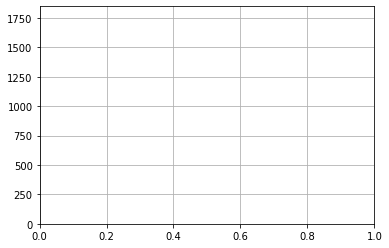

In [ ]:
df['mean_test_score'].hist(bins = 50)
plt.xlim(0, 1)

In [ ]:
to_calc = df[df['mean_test_score'] > .7]

In [ ]:
best = result.best_estimator_

In [ ]:
to_calc['params'].iloc[0]

{'dim reduction': 'passthrough',
 'feature engineering': 'passthrough',
 'feature selection': 'passthrough',
 'model': RandomForestRegressor(),
 'scaler': 'passthrough'}

In [ ]:
df['params'].iloc[0]

{'dim reduction': 'passthrough',
 'feature engineering': 'passthrough',
 'feature selection': 'passthrough',
 'model': LinearRegression(),
 'scaler': 'passthrough'}

In [ ]:
best

Pipeline(steps=[('encode',
                 TargetEncoder(cols=['company', 'level', 'title', 'location',
                                     'tag', 'gender', 'Race', 'Education',
                                     'state'])),
                ('scaler', MinMaxScaler()),
                ('feature engineering', SplineTransformer()),
                ('feature selection', 'passthrough'),
                ('dim reduction', 'passthrough'),
                ('model', HistGradientBoostingRegressor())])

In [ ]:
importance['importances_mean']

array([0.25601947, 0.22876418, 0.04144264, 0.24091425, 0.15554396,
       0.00701923, 0.01032955, 0.00240876, 0.00052305, 0.00437272,
       0.03073898])

In [ ]:
sorted_idx = importance.importances_mean.argsort()
pd.DataFrame()

In [ ]:
importance['importances_mean'][sorted_idx].T

array([0.00052305, 0.00240876, 0.00437272, 0.00701923, 0.01032955,
       0.03073898, 0.04144264, 0.15554396, 0.22876418, 0.24091425,
       0.25601947])

In [ ]:
labels = x_test.columns[sorted_idx]
imp = importance['importances_mean'][sorted_idx].T
imp_combined = pd.DataFrame({'Feature' : labels, 'Importance': imp}).sort_values(by = 'Importance', ascending=False)
imp_combined

,Feature,Importance
10,company,0.256019
9,location,0.240914
8,level,0.228764
7,yearsofexperience,0.155544
6,title,0.041443
5,state,0.030739
4,tag,0.010330
3,yearsatcompany,0.007019
2,Education,0.004373
1,gender,0.002409


In [ ]:
imp_combined['Importance'] = imp_combined['Importance']

In [ ]:
ex = best.score(x_test, y_test)
ex

0.773755053270618

In [ ]:
imp_combined['Importance'] = imp_combined['Importance'] * ex

In [ ]:
imp_combined = imp_combined.append({'Feature' : 'Unexplained Variance', 'Importance':1-ex}, ignore_index=True)

In [ ]:
imp_combined

,Feature,Importance
0,company,0.198096
1,location,0.186409
2,level,0.177007
3,yearsofexperience,0.120353
4,title,0.032066
5,state,0.023784
6,tag,0.007993
7,yearsatcompany,0.005431
8,Education,0.003383
9,gender,0.001864


In [ ]:
px.pie(imp_combined, 'Feature', 'Importance', hole = 0.5, width=950, height=550)